<a href="https://colab.research.google.com/github/FarhaKousar1601/IBM-ASSIGMENT_VTU-ROOMAN-INTERNSHIP/blob/main/Analysis_using_clustering_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

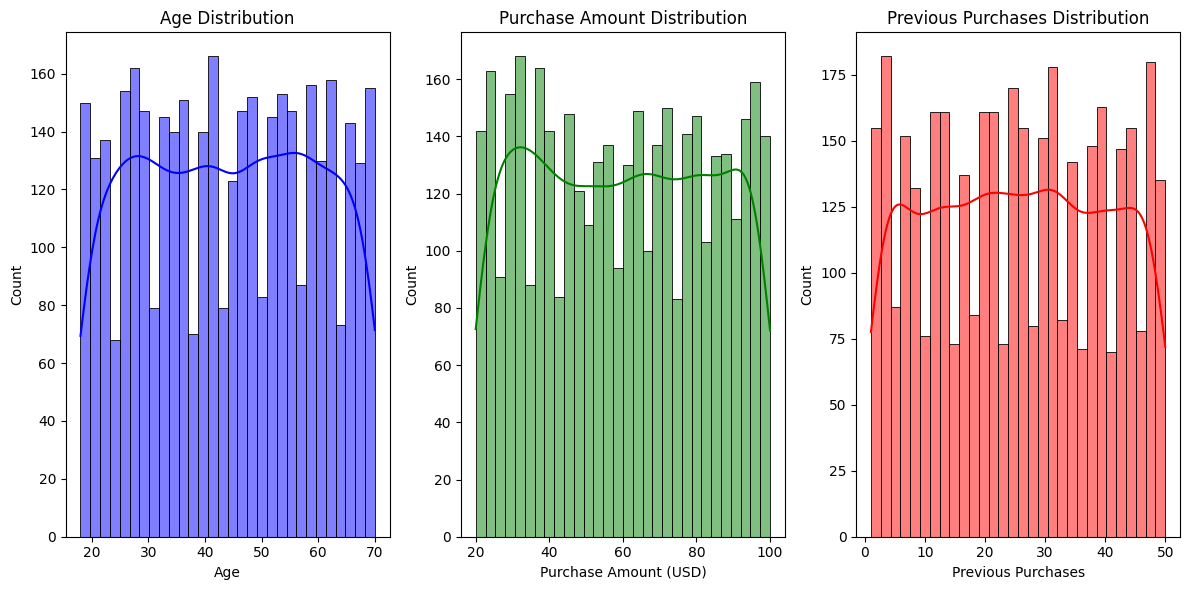

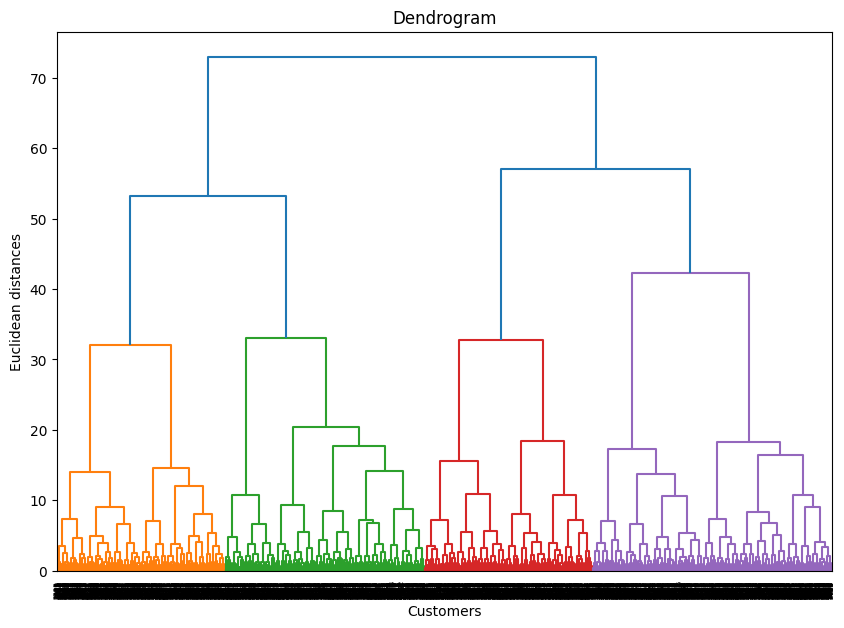

               Age                  Purchase Amount (USD)                    \
              mean median       std                  mean median        std   
Cluster                                                                       
0        32.985012   32.0  9.571212             58.914238   59.0  23.147861   
1        54.102590   54.0  9.051775             81.461155   82.0  12.499232   
2        31.436836   30.0  8.642381             53.822904   51.0  22.441293   
3        60.502358   61.0  6.301927             41.214623   39.0  14.016138   

        Previous Purchases                    
                      mean median        std  
Cluster                                       
0                13.523730   13.0   8.590769  
1                25.875498   27.0  13.540951  
2                39.467532   41.0   7.743590  
3                27.383255   28.0  13.309167  


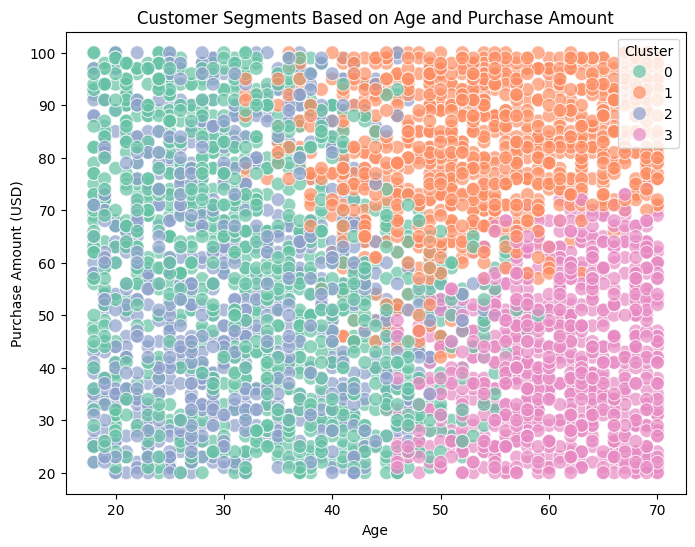

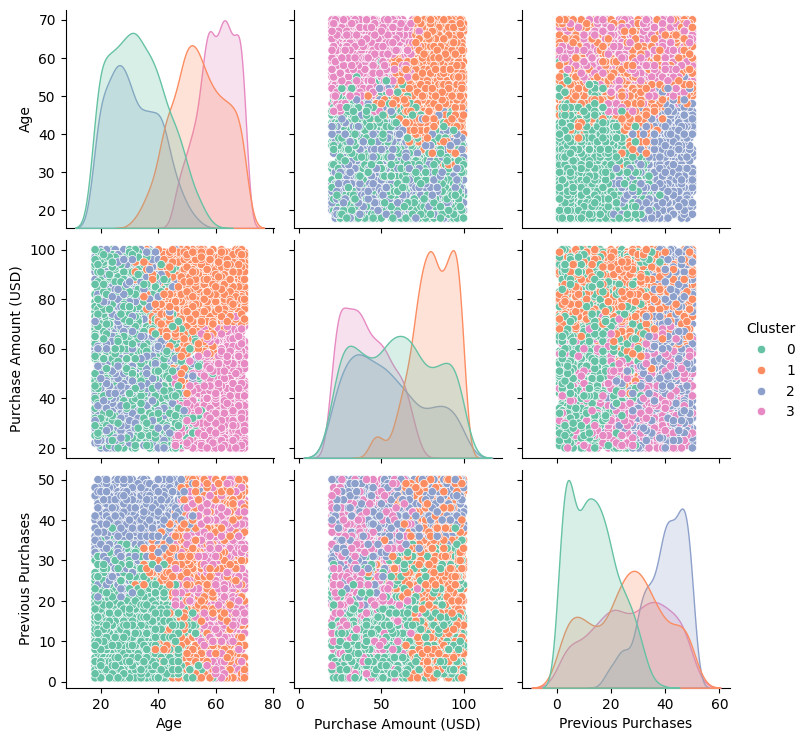

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Step 1: Data Aggregation
# Load the dataset
df = pd.read_csv('/content/shopping_trends.csv')

# Display the first few rows of the dataset
print(df.head())

# Handle missing values by dropping rows with missing data (you can also fill them with appropriate values)
df.dropna(inplace=True)

# Visualizing distributions for features like Age, Purchase Amount, and Previous Purchases (replace with available features)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='blue', bins=30)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Purchase Amount (USD)'], kde=True, color='green', bins=30)
plt.title('Purchase Amount Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Previous Purchases'], kde=True, color='red', bins=30)
plt.title('Previous Purchases Distribution')

plt.tight_layout()
plt.show()

# Step 2: Clustering Using Hierarchical Clustering
# Select features for clustering - adjust these based on your data
features = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']
df_cluster = df[features]

# Step 3: Standardize the data (normalize numerical features)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Apply Hierarchical Clustering using AgglomerativeClustering
# Define the number of clusters (choose the optimal number later based on Dendrogram)
agg_clustering = AgglomerativeClustering(n_clusters=4)  # Update n_clusters after analysis
df['Cluster'] = agg_clustering.fit_predict(df_scaled)

# Step 4: Plotting the Dendrogram to visualize the clustering process
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Step 5: Cluster Profiling
# Compare clusters based on summary statistics
cluster_profile = df.groupby('Cluster')[['Age', 'Purchase Amount (USD)', 'Previous Purchases']].agg(['mean', 'median', 'std'])
print(cluster_profile)

# Visualizing the clusters
# Scatter plot of clusters based on 'Age' and 'Purchase Amount (USD)'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Purchase Amount (USD)', hue='Cluster', palette='Set2', s=100, alpha=0.7)
plt.title('Customer Segments Based on Age and Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# Pairplot of the clusters
sns.pairplot(df, hue='Cluster', vars=['Age', 'Purchase Amount (USD)', 'Previous Purchases'], palette='Set2')
plt.show()

# Save the results if necessary
df.to_csv('segmented_customers.csv', index=False)
